<a href="https://colab.research.google.com/github/Exo-dar/exo/blob/master/Algoritmos_AG4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG4 - Actividad Guiada 4
Nombre: Héctor Fernández Bueno <br>
Link:   https://colab.research.google.com/drive/10E8fM1eSO2klIxNV4gBolFIFRbdJwiAe#scrollTo=iaHHKQeeYiDl <br>
Github: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>


#Carga de librerias

In [1]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [2]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios
import numpy as np
#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




In [3]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())
datos = np.asarray(Nodos)
np.savetxt("nodos.csv",   # Archivo de salida
           datos.T,        # Trasponemos los datos
           fmt="%d",       # Usamos números enteros
           delimiter=",")  # Para que sea un CSV de verdad
#Aristas
Aristas = list(problem.get_edges())
datos1 = np.asarray(Aristas)
np.savetxt("aristas.csv",   # Archivo de salida
           datos.T,        # Trasponemos los datos
           fmt="%d",       # Usamos números enteros
           delimiter=",")  # Para que sea un CSV de verdad


In [4]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



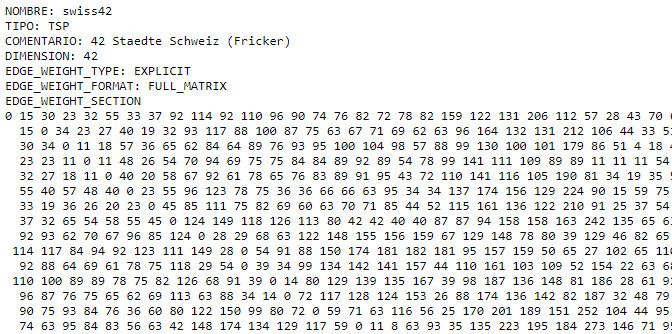

In [5]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [10]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 1, 41, 40, 16, 9, 19, 38, 27, 15, 7, 20, 33, 28, 5, 34, 6, 35, 39, 23, 29, 21, 31, 18, 14, 26, 8, 24, 12, 10, 13, 30, 11, 37, 2, 4, 36, 32, 22, 3, 25, 17]
4840


#BUSQUEDA ALEATORIA

In [18]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 7, 18, 19, 27, 35, 32, 1, 20, 34, 2, 13, 37, 36, 3, 14, 17, 6, 24, 11, 12, 26, 5, 15, 16, 28, 9, 40, 25, 30, 29, 10, 8, 23, 41, 33, 31, 21, 22, 38, 39, 4]
Distancia     : 3488


#BUSQUEDA LOCAL

In [19]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3488
Distancia Mejor Solucion Local: 3187


In [27]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina

sol = busqueda_local(nueva_solucion, problem )

En la iteracion  26 , la mejor solución encontrada es: [0, 6, 4, 3, 2, 27, 32, 34, 33, 20, 16, 15, 37, 36, 35, 31, 17, 7, 18, 11, 12, 26, 5, 14, 19, 13, 25, 40, 24, 21, 39, 9, 8, 23, 41, 10, 29, 22, 38, 30, 28, 1]
Distancia     : 1782


In [21]:
#Mejora de nota

#Vamos a implementar una solución que se base en VND (Variable Neighborhood Descent) explorando varias vecindades en base a los algoritmos 2_opt y 3_opt (profundización)
# y vamos a añadirle un enfoque de VNS general introduciendo una perturbación controlada que nos permita escapar de minimos locales (exploración)

#Empleamos el algoritmo 2_opt definido para la busqueda local
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

# El otro algoritmo a emplear será el 3_opt que hemos empleado en el otro ejercicio
def genera_vecina_3opt(solucion):
    # Elegimos tres nodos aleatorios diferentes
    a, b, c = sorted(random.sample(range(1, len(solucion) - 1), 3))

    # Generamos tres posibles combinaciones para probar
    opciones = [
        solucion[:a] + solucion[a:b][::-1] + solucion[b:c] + solucion[c:],  # Invertir segmento 1
        solucion[:a] + solucion[a:b] + solucion[b:c][::-1] + solucion[c:],  # Invertir segmento 2
        solucion[:a] + solucion[b:c] + solucion[a:b] + solucion[c:]         # Intercambio sin inversión
    ]

    # Devolvemos la mejor opción
    return min(opciones, key=lambda sol: distancia_total(sol, problem))

# Funcion para, con cada algoritmo, generar un num_vecinas de posibles soluciones y evaluar la mejor de ellas
def genera_mejor_vecina(solucion, problem, alg, num_vecinas=5):
    opciones = []
    for _ in range(num_vecinas):
        vecina = alg(solucion)
        opciones.append(vecina)
    # Devolvemos la mejor solución vecina
    return min(opciones, key=lambda sol: distancia_total(sol, problem))

#Busqueda Local con Entorno Variable (VNS):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina) y 3-opt(funcion genera_vecina_3opt)
#  - Se realiza el bucle sobre un max_iter numero de iteraciones
#  - Se establece una tolerancia a seguir explorando una solución(max_sin_mejora) por si no se ha profundizado lo suficiente
#  - Si se llega a ese umbral se introduce una pequeña perturbación para ver si ahora encontramos mejores soluciones
def busqueda_local_vns(solucion, problem, max_iter=100, max_sin_mejora=20):
    mejor_solucion = solucion
    mejor_distancia = distancia_total(solucion, problem)

    iteracion = 0
    sin_mejora = 0  # Contador de iteraciones sin mejora
    vecindades = [genera_vecina, genera_vecina_3opt] # Algoritmos con los que evaluar una mejor solución

    while iteracion < max_iter:
        iteracion += 1
        mejora = False

        #Evaluamos cada algoritmo posible
        for vecindad in vecindades:
            # Generar y evaluar múltiples vecinas
            nueva_solucion = genera_mejor_vecina(mejor_solucion, problem, vecindad, num_vecinas=5)
            nueva_distancia = distancia_total(nueva_solucion, problem)

            #Si encontramos una mejor solución la guardamos
            if nueva_distancia < mejor_distancia:
                mejor_solucion = nueva_solucion
                mejor_distancia = nueva_distancia
                mejora = True
                sin_mejora = 0  # Reseteamos el contador de intentos sin mejora
                break  # Reiniciamos la búsqueda con la primera vecindad

        if not mejora:
            sin_mejora += 1

        # Si alcanzamos el máximo de intentos sin mejora, aplicamos una perturbación controlada
        if sin_mejora >= max_sin_mejora:
            i, j = sorted(random.sample(range(1, len(solucion)), 2))  # Seleccionar dos nodos aleatorios
            mejor_solucion = solucion[:i] + solucion[i:j][::-1] + solucion[j:] # Intercambiamos los nodos
            mejor_distancia = distancia_total(mejor_solucion, problem)
            sin_mejora = 0  # Reiniciamos el contador

    return mejor_solucion

In [28]:
mejor_solucion = busqueda_local_vns(nueva_solucion, problem)
print("Mejor solución encontrada:", mejor_solucion)
print("Distancia optimizada:", distancia_total(mejor_solucion, problem))

Mejor solución encontrada: [0, 1, 5, 26, 6, 3, 32, 20, 33, 34, 2, 27, 7, 31, 35, 36, 17, 37, 15, 18, 12, 13, 19, 16, 14, 4, 21, 40, 24, 39, 9, 23, 41, 8, 10, 25, 11, 29, 22, 38, 30, 28]
Distancia optimizada: 1875


Aunque hemos implementado esta solución la realidad es que no hemos conseguido mejorar significativamente el resultado obtenido. Se ha trabajado bastante sobre el algoritmo, pero no soy capaz de ver ningún fallo, quizá es una cuestión de aumentar significativamente el numero de iteraciones, pero tarda mucho enseguida. La conclusión es que no mejora el resultado de la busqueda local anteriormente expuesta, pero no encuentro la manera de mejorarlo.

#SIMULATED ANNEALING


In [20]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [24]:
#Mejora de nota

#Vamos a generar un nuevo algoritmo de generación de vecinos que funcione mejor que el genera_vecina_aleatorio
#Para ello nos vamos a basar en el algoritmo 3-opt que realiza tres cortes y reordena los segmentos
def genera_vecina_3opt(solucion):
    # Elegimos tres nodos aleatorios diferentes
    a, b, c = sorted(random.sample(range(1, len(solucion) - 1), 3))

    # Generamos tres posibles combinaciones para probar
    opciones = [
        solucion[:a] + solucion[a:b][::-1] + solucion[b:c] + solucion[c:],  # Invertir segmento 1
        solucion[:a] + solucion[a:b] + solucion[b:c][::-1] + solucion[c:],  # Invertir segmento 2
        solucion[:a] + solucion[b:c] + solucion[a:b] + solucion[c:]         # Intercambio sin inversión
    ]

    # Devolvemos la mejor opción
    return min(opciones, key=lambda sol: distancia_total(sol, problem))

In [32]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina con el nuevo algoritmo 3_opt
    vecina =genera_vecina_3opt(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 31, 17, 36, 35, 20, 33, 34, 32, 38, 22, 39, 24, 40, 21, 23, 41, 9, 8, 29, 30, 28, 27, 2, 3, 4, 6, 10, 25, 11, 12, 18, 26, 5, 13, 19, 14, 16, 15, 7, 37, 1]
con una distancia total de 1453


Observamos que con el cambio que hemos realizado se mejora significativamente el algoritmo, llegando a la mejor solución que hemos tneido hasta ahora de 1453, sigue sin ser la perfecta, pero para ello deberíamos de profundizar más y, entiendo que se escapa del scope de la actividad.

#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


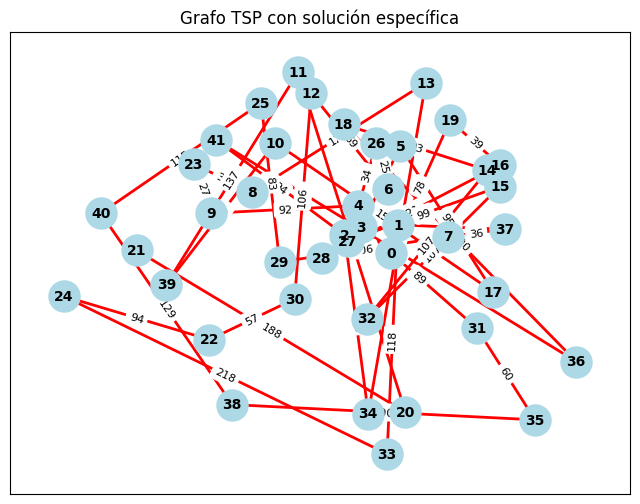

In [ ]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

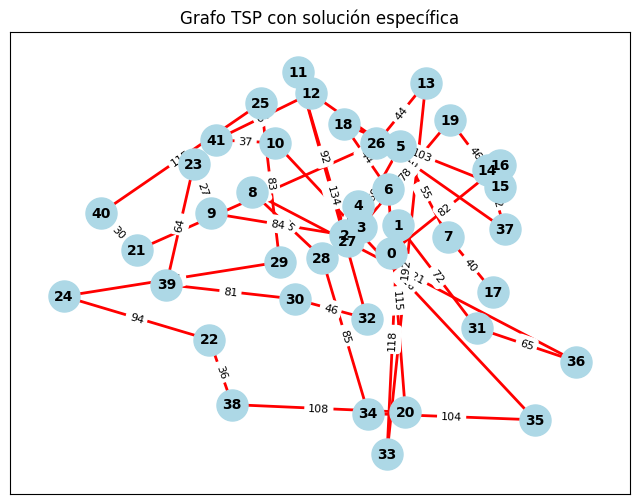

In [ ]:
plot_tsp_solution(problem.edge_weights, solucion)